## Obesity Level Estimation

Feature Name - Description 
NObesity - Target; 
FAVC - Frequent consumption of high caloric food; 
FCVC - Frequency of consumption of vegetables; 
NCP - Number of main meals ; 
CAEC - Consumption of food between meals ; 
CH20 - Consumption of water daily ; 
CALC - Consumption of alcohol ; 
SCC - Calories consumption monitoring ; 
FAF - Pysical activity frequency ; 
TUE - Time using technology devices;
MTRANS- Transportation used ; 
SMOKE - Smokes Yes or No; 
Family - History with Overweight;
Gender - Gender is Male or Female; 
Age - Age in years ; 
Height - Height in meters;
Weight - Weight in kilograms;

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [21]:
# Read file
df = pd.read_csv("ObesityDataSet.csv")

In [22]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2,3,2,0,2,0,0,1,3,3,1
1,0,21,1.52,56.0,1,0,3,3,2,1,3,1,3,0,2,3,1
2,1,23,1.80,77.0,1,0,2,3,2,0,2,0,2,1,1,3,1
3,1,27,1.80,87.0,0,0,3,3,2,0,2,0,2,0,1,4,5
4,1,22,1.78,89.8,0,0,2,1,2,0,2,0,0,0,2,3,6


In [23]:
# split dataset in features and target variable
# Features
X = df.drop(columns=["NObeyesdad"])
#X=x.drop(columns=["family_history_with_overweight"])
# Target variable
y = df['NObeyesdad'] 

In [24]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21,1.62,64.0,1,0,2,3,2,0,2,0,0,1,3,3
1,0,21,1.52,56.0,1,0,3,3,2,1,3,1,3,0,2,3
2,1,23,1.80,77.0,1,0,2,3,2,0,2,0,2,1,1,3
3,1,27,1.80,87.0,0,0,3,3,2,0,2,0,2,0,1,4
4,1,22,1.78,89.8,0,0,2,1,2,0,2,0,0,0,2,3


In [25]:
# import sklearn packages for data treatments
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_train:', y_train.shape)
print('Shape of Y_test:', y_test.shape)

Shape of X_train: (1477, 16)
Shape of X_test: (634, 16)
Shape of Y_train: (1477,)
Shape of Y_test: (634,)


### PCA

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
# features are columns from x_std
features = x_std.T 
covariance_matrix = np.cov(features)
#print(covariance_matrix)
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[2.59552692 1.81859451 1.53644032 0.21842418 0.33011757 0.41280573
 1.32418704 0.6151954  1.11589802 1.05344107 0.98933343 0.72386189
 0.77168389 0.79165806 0.86373493 0.84667999]


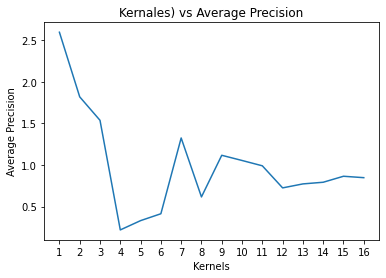

In [34]:
import matplotlib.pyplot as plt
features=np.array(['1','2','3','4','5','6','7','8','9','10','11',
                   '12','13','14','15','16'])
# creating the bar plot 
plt.plot(features,eig_vals)
plt.title("Kernales) vs Average Precision")
plt.xlabel("Kernels")
plt.ylabel("Average Precision")
plt.show()

### SVM - Kernel

In [37]:
kernels = ["linear", "poly", "rbf", "sigmoid"]

report_listt = []

i = 1
for k in kernels:
    print("Kernel =", k)
    i = i + 1
    model = SVC(kernel= k, C = 10)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    test_scores=model.score(X_test, y_test)
    print("Accuracy: ",test_scores)

Kernel = linear
Accuracy:  0.9337539432176656
Kernel = poly
Accuracy:  0.7397476340694006
Kernel = rbf
Accuracy:  0.7129337539432177
Kernel = sigmoid
Accuracy:  0.025236593059936908


### Change Regularization parameter-c value

In [38]:
clist = [10, 12, 9, 15, 17, 19, 21, 50, 70, 100]

report_listt = []

i = 1
for c in clist:
    print("C =", c)
    i = i + 1
    model = SVC(kernel='linear', C = c)
    model.fit(X_train, y_train)

    Y_predict = model.predict(X_test)
    
    report = classification_report(y_test, Y_predict, output_dict=True)
    report_listt.append(report)
    
    print(classification_report(y_test, Y_predict))

C = 10
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        92
           1       0.93      0.82      0.87        77
           2       0.94      0.94      0.94       114
           3       0.94      0.98      0.96        85
           4       1.00      0.99      0.99        92
           5       0.89      0.90      0.89        89
           6       0.92      0.92      0.92        85

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634

C = 12
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        92
           1       0.90      0.82      0.86        77
           2       0.96      0.94      0.95       114
           3       0.94      0.98      0.96        85
           4       1.00      0.99      0.99        92
           5       0.90      0.89      0.89        89
          

In [42]:
y_prec = []
for i in range(len(report_listt)):
    y_prec.append(report_listt[i]['macro avg']['precision'])
    
for i in range(len(clistt)):
    print("C:",clistt[i],":  Avg Accuracy -", y_prec[i])

C: 10 :  Avg Accuracy - 0.9333074560423397
C: 12 :  Avg Accuracy - 0.9334534015128667
C: 9 :  Avg Accuracy - 0.9345852517818353
C: 15 :  Avg Accuracy - 0.9301494637072146
C: 17 :  Avg Accuracy - 0.9289367849038105
C: 19 :  Avg Accuracy - 0.9304637260516978
C: 21 :  Avg Accuracy - 0.930414304921963
C: 50 :  Avg Accuracy - 0.9428178276826956
C: 70 :  Avg Accuracy - 0.9425282034687991
C: 100 :  Avg Accuracy - 0.9480448771768487


### Change Kernel coefficient-gamma value

In [43]:
glistt = [1, 0.1, 0.01, 0.001, 0.0001]

report_listt = []

i = 1
for g in glistt:
    print("Gamma =", g)
    i = i + 1
    model = SVC(kernel='linear', gamma = g)
    model.fit(X_train, y_train)

    Y_predict = model.predict(X_test)
    
    report = classification_report(y_test, Y_predict, output_dict=True)
    report_listt.append(report)
    
    print(classification_report(y_test, Y_predict))

Gamma = 1
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        92
           1       0.82      0.66      0.73        77
           2       0.83      0.88      0.85       114
           3       0.92      0.94      0.93        85
           4       1.00      0.99      0.99        92
           5       0.77      0.75      0.76        89
           6       0.73      0.72      0.72        85

    accuracy                           0.85       634
   macro avg       0.85      0.84      0.84       634
weighted avg       0.85      0.85      0.84       634

Gamma = 0.1
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        92
           1       0.82      0.66      0.73        77
           2       0.83      0.88      0.85       114
           3       0.92      0.94      0.93        85
           4       1.00      0.99      0.99        92
           5       0.77      0.75      0.76        89
  

In [46]:
y_prec = []
for i in range(len(report_listt)):
    y_prec.append(report_listt[i]['macro avg']['precision'])
    
for i in range(len(glistt)):
    print("Gamma-",glistt[i]," : Avg Accuracy -", y_prec[i])

Gamma- 1  : Avg Accuracy - 0.8454019644611261
Gamma- 0.1  : Avg Accuracy - 0.8454019644611261
Gamma- 0.01  : Avg Accuracy - 0.8454019644611261
Gamma- 0.001  : Avg Accuracy - 0.8454019644611261
Gamma- 0.0001  : Avg Accuracy - 0.8454019644611261


### Grid Search

In [47]:
from sklearn.model_selection import GridSearchCV   
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear','rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.841, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.824, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.810, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.803, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.233, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.220, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.231, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.220, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.237, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.841, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.824, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.6min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [48]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print("\n", grid.best_estimator_)

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

 SVC(C=1000, gamma=1, kernel='linear')
